In [2]:
import pandas as pd
df = pd.read_csv("NationalNames.csv")

C:\Users\verni\AppData\Local\Temp\ipykernel_20088\3044730397.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Завдання 1: Виведіть перші 8 рядків набору даних.

In [3]:
print("Перші 8 рядків набору даних:")
print(df.head(8))

Перші 8 рядків набору даних:
   Id        Name  Year Gender  Count
0   1        Mary  1880      F   7065
1   2        Anna  1880      F   2604
2   3        Emma  1880      F   2003
3   4  Elizabet1h  1880      F   1939
4   5      Minnie  1880      F   1746
5   6    Margaret  1880      F   1578
6   7         Ida  1880      F   1472
7   8       Alice  1880      F   1414


Завдання 2: Вивести останні 8 рядків набору даних.

In [4]:
print("\nОстанні 8 рядків набору даних:")
print(df.tail(8))


Останні 8 рядків набору даних:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


Завдання 3: Отримайте імена стовпців набору даних

In [5]:
print("\nІмена стовпців набору даних:")
print(df.columns)


Імена стовпців набору даних:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


Завдання 5: Знайдіть кількість унікальних імен у наборі даних

In [6]:
unique_names_count = len(df['Name'].unique())
print("\nКількість унікальних імен у наборі даних:", unique_names_count)


Кількість унікальних імен у наборі даних: 93890


Завдання 10: Підрахуйте кількість унікальних імен у кожному році

In [7]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()
print("\nКількість унікальних імен у кожному році:")
print(unique_names_by_year)


Кількість унікальних імен у кожному році:
Year
1880     1890
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


Завдання 11: Знайдіть рік із найбільшою кількістю унікальних імен.

In [8]:
year_with_most_unique_names = unique_names_by_year.idxmax()
print("\nРік з найбільшою кількістю унікальних імен:", year_with_most_unique_names)


Рік з найбільшою кількістю унікальних імен: 2008


Завдання 12: Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен

In [9]:
df_year = df[df['Year'] == year_with_most_unique_names]

sum_counts = df_year.groupby('Name')['Count'].sum()

max_name = sum_counts.idxmax()
max_count = sum_counts[max_name]

print("Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен:", max_name)

Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен: Jacob


Завдання 13: Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [10]:
year_jacob_most_popular_female_name = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum().idxmax()
print("\nРік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен:", year_jacob_most_popular_female_name)


Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен: 2004


Завдання 14: Знайти рік із найбільшою кількістю гендерно нейтральних імен

In [11]:
grouped = df.groupby(['Year', 'Gender']).agg({'Name': pd.Series.nunique})

grouped = grouped.unstack()

grouped['Total'] = grouped.sum(axis=1)

max_year = grouped['Total'].idxmax()
max_count = grouped.loc[max_year, 'Total']

print("Рік із найбільшою кількістю гендерно нейтральних імен:", max_year)

Рік із найбільшою кількістю гендерно нейтральних імен: 2008


Завдання 15: Знайдіть загальну кількість народжень за рік.

In [12]:
total_births_by_year = df.groupby('Year')['Count'].sum()
print("\nЗагальна кількість народжень за рік:")
print(total_births_by_year)


Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


Завдання 16: Знайдіть рік, коли народилося найбільше дітей

In [13]:
year_with_most_births = total_births_by_year.idxmax()
print("\nРік, коли народилося найбільше дітей:", year_with_most_births)


Рік, коли народилося найбільше дітей: 1957


Завдання 17: Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [14]:
births_by_gender_and_year = df.groupby(['Year', 'Gender'])['Count'].sum()
print("\nКількість дівчаток та хлопчиків, які народились кожного року:")
print(births_by_gender_and_year)


Кількість дівчаток та хлопчиків, які народились кожного року:
Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
                 ...   
2012  M         1889414
2013  F         1745339
      M         1881463
2014  F         1768775
      M         1901376
Name: Count, Length: 270, dtype: int64


Завдання 18: Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [15]:
years_more_girls_than_boys = (births_by_gender_and_year.loc[:, 'F'] > births_by_gender_and_year.loc[:, 'M']).sum()
print("\nКількість років, коли дівчаток народжувалось більше, ніж хлопчиків:", years_more_girls_than_boys)


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


Завдання 21: Порахуйте, скільки разів хлопчиків називали Barbara

In [16]:
barbara_male_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print("\nСкільки разів хлопчиків називали Barbara:", barbara_male_count)


Скільки разів хлопчиків називали Barbara: 4139


Завдання 22: Підрахуйте скільки років проводилось спостереження

In [17]:
observation_years = df['Year'].nunique()
print("\nСкільки років проводилось спостереження:", observation_years)


Скільки років проводилось спостереження: 135


Завдання 23: Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [25]:
grouped = df.groupby('Name')
gender_neutral = grouped.filter(lambda x: x['Gender'].nunique() == 2)
gender_neutral = gender_neutral.groupby('Name').filter(lambda x: len(x) == 270)
gender_neutral_names = gender_neutral['Name'].unique()
print(gender_neutral_names)

['Jessie' 'Ollie' 'Marion' 'Jean' 'Francis' 'John' 'William' 'Lee' 'James'
 'Sidney' 'Robert' 'Joseph' 'Tommie' 'Johnnie' 'Leslie' 'Jesse']


Завдання 24: Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [19]:
grouped = df.groupby('Year')
def get_least_popular_names(group):
    min_count = group['Count'].min()
    return group[group['Count'] == min_count]
least_popular_names = grouped.apply(get_least_popular_names)

least_popular_names.reset_index(drop=True, inplace=True)

name_counts = least_popular_names.groupby('Name')['Count'].sum()

most_popular_name = name_counts.idxmax()
most_popular_count = name_counts.max()
print("Найбільш популярне серед непопулярних імен - це " + most_popular_name + ". Їм називали " + str(most_popular_count) + " разів.")

Найбільш популярне серед непопулярних імен - це Celester. Їм називали 160 разів.


C:\Users\verni\AppData\Local\Temp\ipykernel_20088\536399339.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  least_popular_names = grouped.apply(get_least_popular_names)


Завдання 26: Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

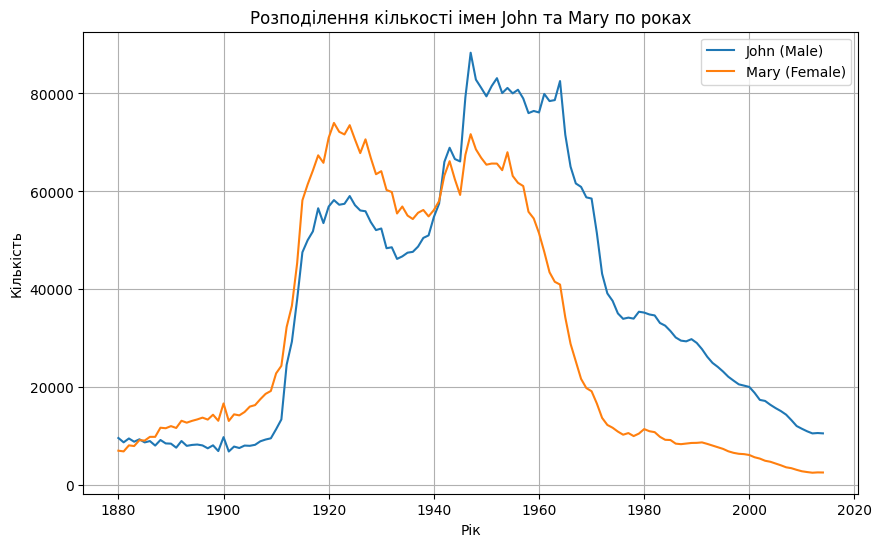

In [20]:
import matplotlib.pyplot as plt

# Фільтрація даних
john_data = df[(df['Name'] == 'John') & (df['Gender'] == 'M')]
mary_data = df[(df['Name'] == 'Mary') & (df['Gender'] == 'F')]

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(john_data['Year'], john_data['Count'], label='John (Male)')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary (Female)')
plt.title('Розподілення кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()

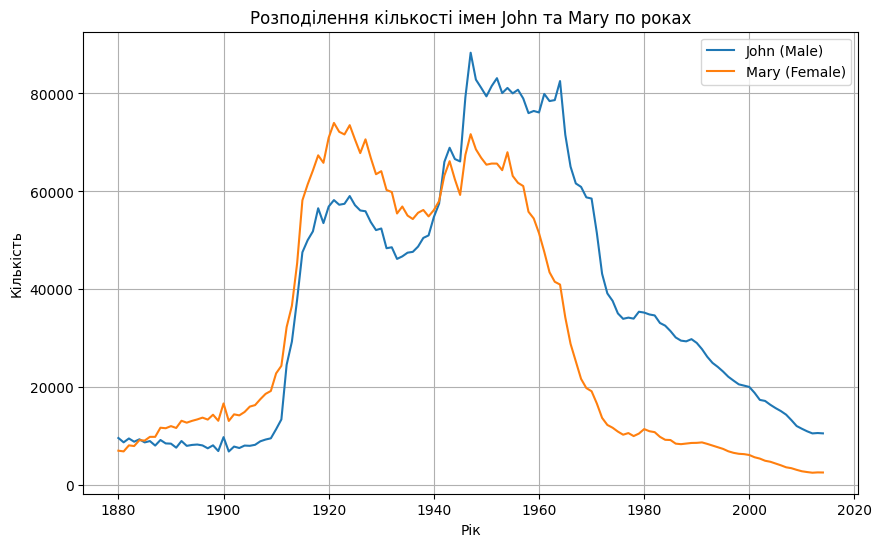

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(john_data['Year'], john_data['Count'], label='John (Male)')
plt.plot(mary_data['Year'], mary_data['Count'], label='Mary (Female)')
plt.title('Розподілення кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.show()